Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
#importing data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#data analysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


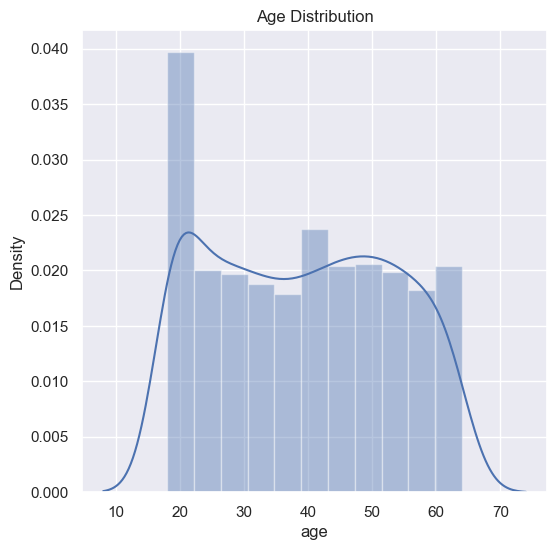

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
#the datasset contains  1338 rows and 7 columns

In [14]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [15]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


# EXPLORATORY DATA ANALYSIS (EDA)¶

In [16]:
df.shape

(1338, 7)

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [19]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
#there are three types of dataset (int(2),object(3),float(2))

In [22]:
# checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df.isnull().sum().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

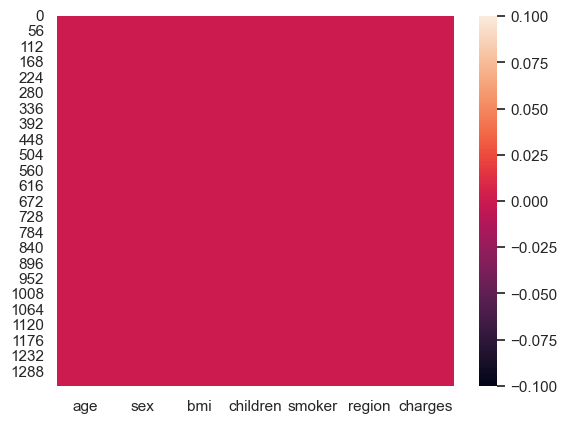

In [25]:
# using heat map
sns.heatmap(df.isnull())

observation: there is no null value in the dataset

In [26]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [27]:
df['charges'].nunique()

1337

In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


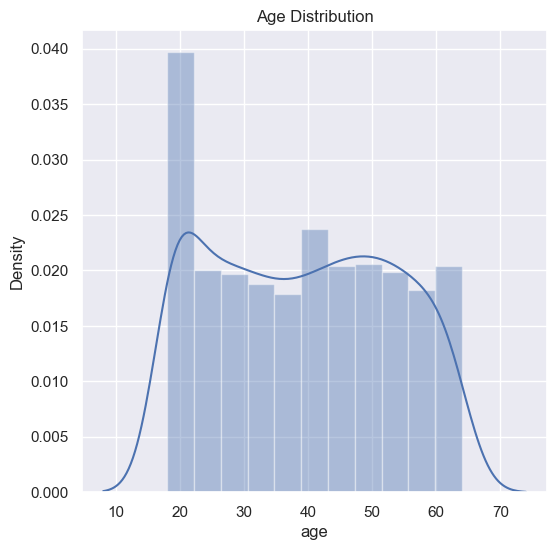

In [29]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

# from above graph it is observed that Most insurance holder age around 20 to 23

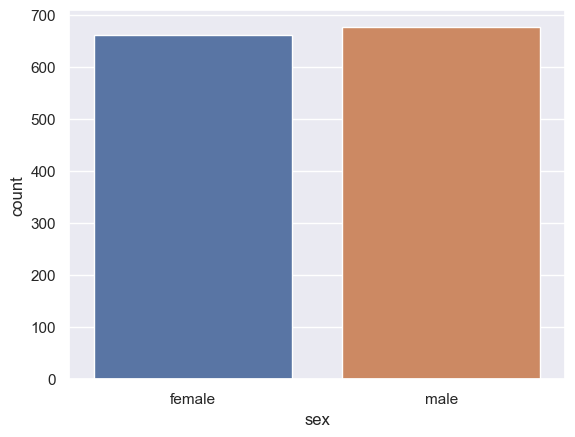

In [30]:
# number of male and female
sns.countplot('sex', data=df)
plt.show()

In [31]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

 males are slightly more than females

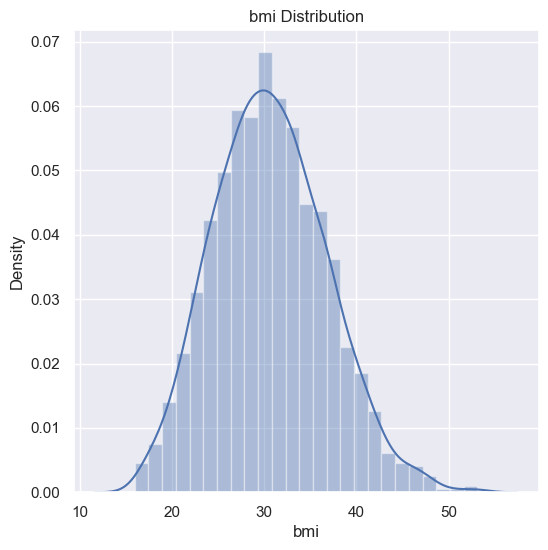

In [33]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

in our data set most people is near to obese range they are over weight.
as bmi over 30 is consider as obese.

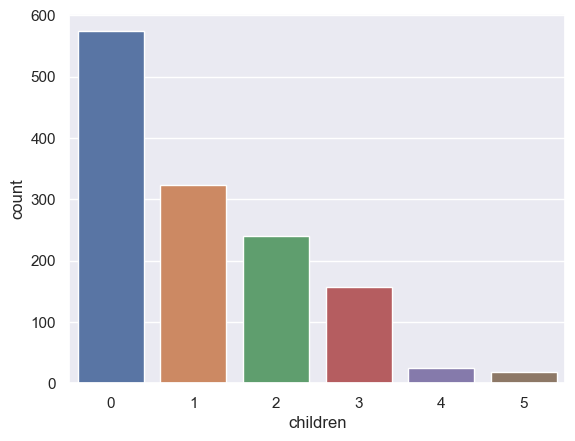

In [34]:
# no of people have  children
sns.countplot('children', data=df)
plt.show()

In [35]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

we have more people with no child .
324 person has only one child
240 persons has 2 children.
157 persons has 3 children.
25 persons has 4 children.
18 persons has 5 children.

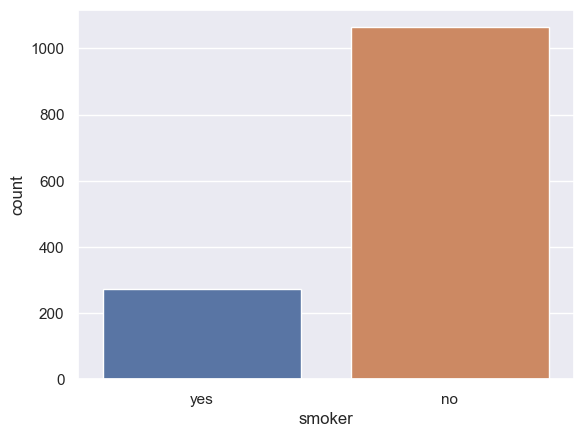

In [36]:
# no. of people  smokes
sns.countplot('smoker', data=df)
plt.show()

In [37]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

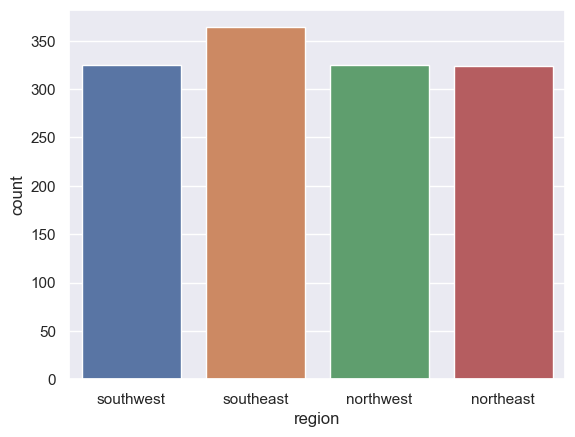

In [38]:
# region
sns.countplot('region', data=df)
plt.show()

In [39]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

most people belongs to southeast region.

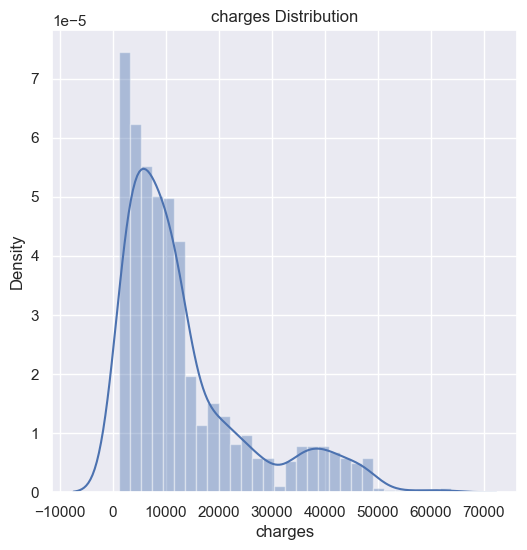

In [41]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

# encoding columns¶

In [42]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding region column
df.replace({'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3}}, inplace=True)

In [43]:
x = df.drop(columns='charges', axis=1)
y = df['charges']
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       2
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       1
4      32    0  28.880         0       1       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       1
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       2
1337   61    1  29.070         0       0       1

[1338 rows x 6 columns]


# Splitting Dataset

In [44]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=5)
y_train

1167     4529.47700
531     14043.47670
657      4058.71245
234      6710.19190
544     10231.49990
           ...     
73      11946.62590
1142    27117.99378
998      6551.75010
206     11743.29900
867     11576.13000
Name: charges, Length: 1003, dtype: float64

In [45]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1003, 6) (335, 6)


In [46]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
lr.score(x_train,y_train)

0.7453470202775898

In [48]:
lr.score(x_test,y_test)

0.761909465842713

In [49]:
y_pred=lr.predict(x_test)

In [50]:
r2_score(y_test,y_pred)

0.761909465842713

In [51]:
input_data = (27,0,42.13,0,0,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is ', prediction[0])

[31800.29550809]
The insurance cost is  31800.29550808978


# The predicted insurance cost is 31800.29550808978